##Team 5 Jupyter notebook - Project 1

In [93]:
#Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import random
import pylab
import gmaps
import json
import os

In [14]:
## Create a url API INEGI
# url_path = https://www.inegi.org.mx/app/api/indicadores/desarrolladores/jsonxml/INDICATOR/6207079505/es/0700/true/BISE/2.0/[1eda5bfc-0e53-ec67-9976-42321b74e950]?type=json


In [3]:
#Import documentation
df = pd.read_excel("Resources/Centraleselectricas-2.xlsx")
df

,No.,Número de identificación del proyecto asignado por el distribuidor,Nivel de tensión en el punto de interconexión,Número de fases,Capacidad de la central eléctrica (kW),Área Administrativa del Distribuidor (Division),Área Administrativa del Distribuidor (Zona),Estado,Municipio,Fecha Solicitud,Estado en que se encuentra la solicitud: Recibida/Atendida/En lista de espera/Cancelada,Fecha de Interconexión Física,Estudio de interconexión requerido (Si/No),Tecnología,Ubicación por circuito de distribución,Capacidad del circuito de distribución para albergar CE de GD,Ubicación por subestación,Ubicación por Red de Distribución,Ubicación por NodoP,Regímen de contraprestación seleccionado
0,1,62003,BAJA,2,1.65,DIVISION BAJA CALIFORNIA,ZONA TIJUANA,Baja California,Tijuana,2017-05-29,ATENDIDA,2017-05-31,No,FUENTE DE ENERGIA SOLAR,RII04175,No disponible,RIO,No disponible,07RII-69,MEDICIÓN NETA DE ENERGÍA
1,2,64518,BAJA,2,4.88,DIVISION BAJA CALIFORNIA,ZONA TIJUANA,Baja California,Tijuana,2017-04-13,ATENDIDA,2017-04-19,No,FUENTE DE ENERGIA SOLAR,HMO04155,No disponible,HIPODROMO,No disponible,07HMO-69,MEDICIÓN NETA DE ENERGÍA
2,3,63639,BAJA,2,3.72,DIVISION BAJA CALIFORNIA,ZONA TIJUANA,Baja California,Tijuana,2017-05-02,ATENDIDA,2017-05-11,No,FUENTE DE ENERGIA SOLAR,HMO04155,No disponible,HIPODROMO,No disponible,07HMO-69,MEDICIÓN NETA DE ENERGÍA
3,4,63640,BAJA,2,5.58,DIVISION BAJA CALIFORNIA,ZONA TIJUANA,Baja California,Tijuana,2017-04-20,ATENDIDA,2017-04-24,No,FUENTE DE ENERGIA SOLAR,HMO04155,No disponible,HIPODROMO,No disponible,07HMO-69,MEDICIÓN NETA DE ENERGÍA
4,5,66728,BAJA,2,3.72,DIVISION BAJA CALIFORNIA,ZONA TIJUANA,Baja California,Tijuana,2017-04-21,ATENDIDA,2017-04-25,No,FUENTE DE ENERGIA SOLAR,HMO04155,No disponible,HIPODROMO,No disponible,07HMO-69,MEDICIÓN NETA DE ENERGÍA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100332,100333,196291,BAJA,2,1.50,DIVISION VALLE MEXICO SUR ...,ZONA VOLCANES,Estado de México,Amanalco,2019-11-26,EN LISTA DE ESPERA,2019-12-03,NO,FUENTE DE ENERGIA SOLAR ...,IXL53085,2.62,IXTAPALUCA,No Disponible,01IXL-230,MEDICIÓN NETA DE ENERGÍA ...
100333,100334,195138,BAJA,2,2.64,DIVISION VALLE MEXICO SUR ...,ZONA VOLCANES,Estado de México,Calimaya,2019-08-29,EN LISTA DE ESPERA,2019-09-05,NO,FUENTE DE ENERGIA SOLAR ...,JCP53035,1.82,JUCHITEPEC,No Disponible,01JCP-85,MEDICIÓN NETA DE ENERGÍA ...
100334,100335,213873,BAJA,2,1.00,DIVISION VALLE MEXICO SUR ...,ZONA VOLCANES,Estado de México,Tenango del Aire,2019-12-20,EN LISTA DE ESPERA,2019-12-27,NO,FUENTE DE ENERGIA SOLAR ...,JCP53025,2.02,JUCHITEPEC,No Disponible,01JCP-85,MEDICIÓN NETA DE ENERGÍA ...
100335,100336,202369,BAJA,2,9.00,DIVISION VALLE MEXICO SUR ...,ZONA VOLCANES,Estado de México,Tlalmanalco,2019-07-23,EN LISTA DE ESPERA,2019-07-30,NO,FUENTE DE ENERGIA SOLAR ...,AGV53015,3.31,AGUA VIVA,No Disponible,01AGV-85,MEDICIÓN NETA DE ENERGÍA ...


In [4]:
#Clean Data
col=['No.','Número de identificación del proyecto asignado por el distribuidor','Nivel de tensión en el punto de interconexión'
, 'Número de fases','Área Administrativa del Distribuidor (Division)','Área Administrativa del Distribuidor (Zona)', 'Ubicación por circuito de distribución','Capacidad del circuito de distribución para albergar CE de GD',
    'Ubicación por subestación','Ubicación por Red de Distribución','Ubicación por NodoP','Regímen de contraprestación seleccionado','Estudio de interconexión requerido (Si/No)'
    ]
clean_df= df.drop(columns=col)
clean_df['year']=pd.DatetimeIndex(clean_df['Fecha de Interconexión Física']).year
clean_df_loc = clean_df.loc[clean_df["Estado en que se encuentra la solicitud: Recibida/Atendida/En lista de espera/Cancelada"] == "ATENDIDA"]
clean_df_loc = clean_df_loc.drop(columns = ["Estado en que se encuentra la solicitud: Recibida/Atendida/En lista de espera/Cancelada", "Fecha Solicitud", "Fecha de Interconexión Física", "Municipio"])
clean_df_gp = clean_df_loc.groupby(["year", "Estado", "Tecnología"]).sum()
clean_df_gp

Capacidad de la central eléctrica (kW)
year Estado              Tecnología                                                              
2017 Aguascalientes      FUENTE DE ENERGIA SOLAR                                          5322.08
     Baja California     FUENTE DE ENERGIA SOLAR                                          5689.40
     Baja California Sur FUENTE DE ENERGIA SOLAR                                          2853.31
     Campeche            FUENTE DE ENERGIA SOLAR                                           998.20
     Chiapas             FUENTE DE ENERGIA SOLAR                                          1644.83
...                                                                                           ...
2019 Veracruz            FUENTE DE ENERGIA HIDROELECTRICA                                    8.20
                         FUENTE DE ENERGIA SOLAR                                           851.55
     Yucatán             FUENTE DE ENERGIA GAS                                               1.06
                         FUENTE DE ENERGIA SOLAR                                          7376.56
     Zacatecas           FUENTE DE ENERGIA SOLAR                                           265.05

[138 rows x 1 columns]

Capacidad de la central eléctrica (kW)
year Estado              Tecnología                                                              
2017 Aguascalientes      FUENTE DE ENERGIA SOLAR                                          5322.08
     Baja California     FUENTE DE ENERGIA SOLAR                                          5689.40
     Baja California Sur FUENTE DE ENERGIA SOLAR                                          2853.31
     Campeche            FUENTE DE ENERGIA SOLAR                                           998.20
     Chiapas             FUENTE DE ENERGIA SOLAR                                          1644.83
...                                                                                           ...
2019 Veracruz            FUENTE DE ENERGIA HIDROELECTRICA                                    8.20
                         FUENTE DE ENERGIA SOLAR                                           851.55
     Yucatán             FUENTE DE ENERGIA GAS                                               1.06
                         FUENTE DE ENERGIA SOLAR                                          7376.56
     Zacatecas           FUENTE DE ENERGIA SOLAR                                           265.05

[138 rows x 1 columns]

In [5]:
clean_df_gp.reset_index(inplace = True)
clean_df_gp["Capacidad_kW_2017"] = clean_df_gp.loc[clean_df_gp.year == 2017,"Capacidad de la central eléctrica (kW)"]
clean_df_gp["Capacidad_kW_2018"] = clean_df_gp.loc[clean_df_gp.year == 2018,"Capacidad de la central eléctrica (kW)"]
clean_df_gp["Capacidad_kW_2019"] = clean_df_gp.loc[clean_df_gp.year == 2019,"Capacidad de la central eléctrica (kW)"]
clean_df_gp

,year,Estado,Tecnología,Capacidad de la central eléctrica (kW),Capacidad_kW_2017,Capacidad_kW_2018,Capacidad_kW_2019
0,2017,Aguascalientes,FUENTE DE ENERGIA SOLAR,5322.08,5322.08,NaN,NaN
1,2017,Baja California,FUENTE DE ENERGIA SOLAR,5689.40,5689.40,NaN,NaN
2,2017,Baja California Sur,FUENTE DE ENERGIA SOLAR,2853.31,2853.31,NaN,NaN
3,2017,Campeche,FUENTE DE ENERGIA SOLAR,998.20,998.20,NaN,NaN
4,2017,Chiapas,FUENTE DE ENERGIA SOLAR,1644.83,1644.83,NaN,NaN
...,...,...,...,...,...,...,...
133,2019,Veracruz,FUENTE DE ENERGIA HIDROELECTRICA,8.20,NaN,NaN,8.20
134,2019,Veracruz,FUENTE DE ENERGIA SOLAR,851.55,NaN,NaN,851.55
135,2019,Yucatán,FUENTE DE ENERGIA GAS,1.06,NaN,NaN,1.06
136,2019,Yucatán,FUENTE DE ENERGIA SOLAR,7376.56,NaN,NaN,7376.56


In [6]:
clean_df_gp.loc[clean_df_gp['Capacidad_kW_2017'].isnull(), 'Capacidad_kW_2017'] = 0
clean_df_gp.loc[clean_df_gp['Capacidad_kW_2018'].isnull(), 'Capacidad_kW_2018'] = 0
clean_df_gp.loc[clean_df_gp['Capacidad_kW_2019'].isnull(), 'Capacidad_kW_2019'] = 0
# clean_df_gp.drop("year", inplace = True)
clean_df_gp

,year,Estado,Tecnología,Capacidad de la central eléctrica (kW),Capacidad_kW_2017,Capacidad_kW_2018,Capacidad_kW_2019
0,2017,Aguascalientes,FUENTE DE ENERGIA SOLAR,5322.08,5322.08,0.0,0.00
1,2017,Baja California,FUENTE DE ENERGIA SOLAR,5689.40,5689.40,0.0,0.00
2,2017,Baja California Sur,FUENTE DE ENERGIA SOLAR,2853.31,2853.31,0.0,0.00
3,2017,Campeche,FUENTE DE ENERGIA SOLAR,998.20,998.20,0.0,0.00
4,2017,Chiapas,FUENTE DE ENERGIA SOLAR,1644.83,1644.83,0.0,0.00
...,...,...,...,...,...,...,...
133,2019,Veracruz,FUENTE DE ENERGIA HIDROELECTRICA,8.20,0.00,0.0,8.20
134,2019,Veracruz,FUENTE DE ENERGIA SOLAR,851.55,0.00,0.0,851.55
135,2019,Yucatán,FUENTE DE ENERGIA GAS,1.06,0.00,0.0,1.06
136,2019,Yucatán,FUENTE DE ENERGIA SOLAR,7376.56,0.00,0.0,7376.56


In [7]:
capacity_df = clean_df.groupby(["Estado"])
capacity_df

In [8]:
#Data cleaning
b = pd.read_excel("Resources/4_itaee_var_anual_retro2.xlsx")
b
clean_state = b[["Estado","Crecimiento ITAEE 2017", "Crecimiento ITAEE 2018", "Crecimiento ITAEE 2019"]]
clean_state

,Estado,Crecimiento ITAEE 2017,Crecimiento ITAEE 2018,Crecimiento ITAEE 2019
0,Aguascalientes,2.459206,3.727672,-0.031717
1,Baja California,3.358687,2.284226,2.052373
2,Baja California Sur,10.708411,16.815057,-7.103514
3,Campeche,-10.446591,-1.422752,-2.153711
4,Coahuila de Zaragoza,5.444967,1.233570,0.171539
5,Colima,3.485108,2.503819,4.320531
6,Chiapas,-3.327992,-2.138943,-2.460577
7,Chihuahua,3.307919,1.956625,2.079865
8,Ciudad de México,3.001314,2.690299,-0.309418
9,Durango,-0.269926,1.451128,0.600691


In [9]:
clean_state.rename(columns = {"Crecimiento ITAEE 2017":"Crecimiento_2017"
                              ,"Crecimiento ITAEE 2018":"Crecimiento_2018"
                               ,"Crecimiento ITAEE 2019":"Crecimiento_2019"},inplace= True)
clean_state


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Estado,Crecimiento_2017,Crecimiento_2018,Crecimiento_2019
0,Aguascalientes,2.459206,3.727672,-0.031717
1,Baja California,3.358687,2.284226,2.052373
2,Baja California Sur,10.708411,16.815057,-7.103514
3,Campeche,-10.446591,-1.422752,-2.153711
4,Coahuila de Zaragoza,5.444967,1.233570,0.171539
5,Colima,3.485108,2.503819,4.320531
6,Chiapas,-3.327992,-2.138943,-2.460577
7,Chihuahua,3.307919,1.956625,2.079865
8,Ciudad de México,3.001314,2.690299,-0.309418
9,Durango,-0.269926,1.451128,0.600691


In [9]:
solar_irradiation= pd.read_excel("Resources/IrradiaciónSolar.xlsx")
solar_irradiation.head()

,Estado,Estado.1,Ciudad,Ene,Feb,Mar,Abr,May,Jun,Jul,Agos,Sept,Oct,Nov,Dic,Min,Max,Medida
0,Ags,Aguascalientes,Aguascalientes,4.5,5.2,5.9,6.6,7.2,6.3,6.1,5.9,5.7,5.1,4.8,4.0,4.0,7.2,5.6
1,BCS,Baja California Sur,La Paz,4.4,5.5,6.0,6.6,6.5,6.6,6.3,6.2,5.9,5.8,4.9,4.2,4.2,4.2,6.6
2,BC,Baja California,Mexicali,4.1,4.4,5.0,5.6,6.6,7.3,7.0,6.1,6.1,5.5,4.5,3.9,3.9,7.3,5.5
3,BC,Baja California,San Javier,4.2,4.6,5.3,6.2,6.5,7.1,6.4,6.3,6.4,5.1,4.7,3.7,3.7,7.1,5.5
4,BCS,Baja California Sur,San José del Cabo,5.0,5.6,5.8,5.9,6.9,6.1,5.8,6.2,5.8,5.8,5.2,4.4,4.5,6.3,5.7


In [10]:
solar_irradiation_clean=solar_irradiation.drop(columns=["Estado"])
solar_irradiation_clean
solar_irradiation_clean=solar_irradiation_clean.rename(columns={"Estado.1":"Estado"})
solar_irradiation_clean["Estado"]=solar_irradiation_clean["Estado"].str.replace("Yucatan","Yucatán")
solar_irradiation_clean["Estado"]=solar_irradiation_clean["Estado"].str.replace("Nuevo Leon","Nuevo León")
solar_irradiation_clean
solar_irradiation_clean.groupby("Estado").sum()
avg_solar=solar_irradiation_clean.drop(columns=["Ciudad","Ene","Feb","Mar","Abr","May","Jun","Jul","Agos","Sept","Oct","Nov","Dic","Min","Max"])
avg_solar.head()
grouped_df=pd.merge(clean_state,avg_solar,how="left",on="Estado")
grouped_df.head()
# grouped_df.drop(columns = "medida", inplace=True)

grouped_df.drop_duplicates(subset="Estado", inplace=True)
grouped_df



,Estado,Crecimiento ITAEE 2017,Crecimiento ITAEE 2018,Crecimiento ITAEE 2019,Medida
0,Aguascalientes,2.459206,3.727672,-0.031717,5.6
1,Baja California,3.358687,2.284226,2.052373,5.5
3,Baja California Sur,10.708411,16.815057,-7.103514,6.6
5,Campeche,-10.446591,-1.422752,-2.153711,5.2
6,Coahuila de Zaragoza,5.444967,1.233570,0.171539,NaN
7,Colima,3.485108,2.503819,4.320531,4.9
8,Chiapas,-3.327992,-2.138943,-2.460577,5.4
13,Chihuahua,3.307919,1.956625,2.079865,5.9
16,Ciudad de México,3.001314,2.690299,-0.309418,NaN
17,Durango,-0.269926,1.451128,0.600691,5.7


In [61]:
#Merge Data
merge_df = pd.merge(clean_df_gp, clean_state, how = "inner", on = "Estado")
group_df = merge_df.groupby("Estado").sum()

capacity_df = group_df.drop(columns = ["year", "Capacidad de la central eléctrica (kW)", "Crecimiento ITAEE 2017", "Crecimiento ITAEE 2018", "Crecimiento ITAEE 2019"])
capacity_df

,Capacidad_kW_2017,Capacidad_kW_2018,Capacidad_kW_2019
Estado,,,
Aguascalientes,5322.08,3963.01,3234.14
Baja California,5689.40,9425.13,3000.14
Baja California Sur,2853.31,3393.81,522.90
Campeche,998.20,2389.27,196.24
Chiapas,1644.83,1257.89,394.14
Chihuahua,13138.94,15826.16,11684.36
Ciudad de México,25371.71,29826.01,2771.04
Colima,3017.00,3179.64,1475.86
Durango,2462.20,2931.02,3340.21


In [76]:
top_capacity = capacity_df.nlargest(5, ["Capacidad_kW_2017", "Capacidad_kW_2018", "Capacidad_kW_2019"])
top_capacity

,Capacidad_kW_2017,Capacidad_kW_2018,Capacidad_kW_2019
Estado,,,
Nuevo León,30132.53,25016.08,13726.16
Ciudad de México,25371.71,29826.01,2771.04
Jalisco,22844.92,33073.05,38105.81
Chihuahua,13138.94,15826.16,11684.36
Yucatán,10988.07,7551.38,7377.62


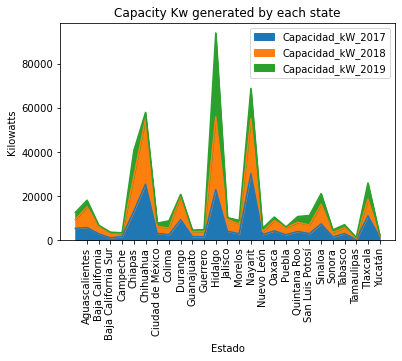

In [129]:
#Area plot to show growth
ax = capacity_df.plot.area()

ax.set_title("Capacity Kw generated by each state")
ax.set_xticklabels(capacity_df.index,rotation=90, minor=False)
ax.set_xticks(range(1,27)) 
ax.set_ylabel("Kilowatts")
ax




In [26]:
#Data cleaning
c = pd.read_excel("Resources/PIBE_2.xlsx")
c
clean_PIBE = c[["Estado",2017,2018,2019]]
clean_PIBE

,Estado,2017,2018,2019
0,Aguascalientes,211672.469,216705.560,224807.469
1,Baja California,535552.651,553327.213,565895.378
2,Baja California Sur,133948.675,148376.630,173047.360
3,Campeche,600612.272,537882.577,529584.304
4,Coahuila de Zaragoza,572243.615,601722.052,609051.269
5,Colima,98576.211,102039.429,104474.901
6,Chiapas,287034.269,277580.835,271621.449
7,Chihuahua,534205.546,551497.303,562599.228
8,Ciudad de México,2957233.594,3045539.859,3128247.710
9,Durango,200660.962,199559.310,202546.990


In [54]:
top_PIBE = clean_PIBE.nlargest(5, [2017, 2018, 2018])
top_PIBE

,2017,2018,2019
Estado,,,
Ciudad de México,2957233.594,3045539.859,3128247.710
México,1485467.443,1556925.971,1605830.823
Nuevo León,1257648.421,1306549.097,1353874.513
Jalisco,1149129.548,1176616.034,1207897.462
Veracruz de Ignacio de la Llave,784930.108,776072.856,794376.310


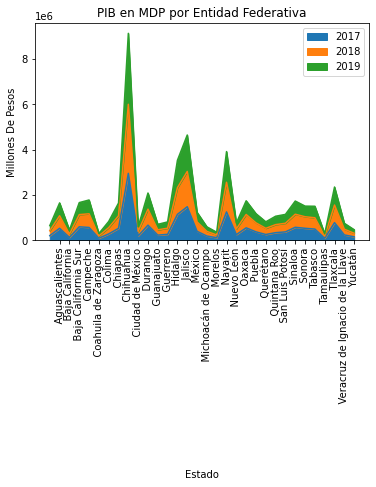

In [134]:

plt = clean_PIBE.plot.area()

plt.set_title('PIB en MDP por Entidad Federativa')
plt.set_xlabel('Estado')
plt.set_ylabel('Millones De Pesos')
plt.set_xticklabels(clean_PIBE.index,rotation=90, )
plt.set_xticks(range(1,32)) 
# Show graphic
plt
# Save plot
#plt.savefig("Output Data/PIB en MDP vs. año")
